In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:/Users/Hamza')

In [3]:
df = pd.read_csv('gld_price_data.csv')

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.shape

(2290, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
Date       2290 non-null object
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5), object(1)
memory usage: 107.4+ KB


In [8]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
corr1 = df.corr()

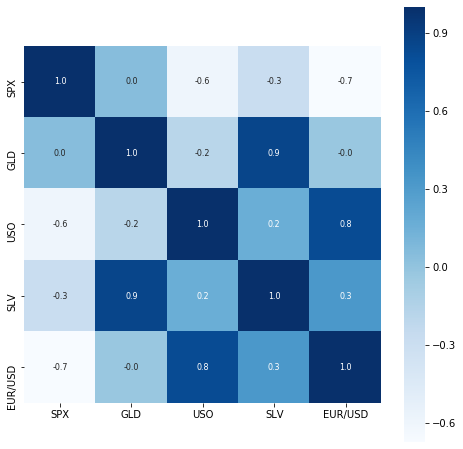

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(corr1, cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
print(corr1['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


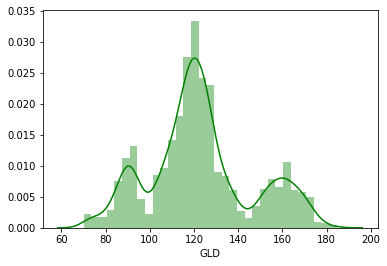

In [15]:
sns.distplot(df['GLD'],color='green')

In [16]:
X = df.drop(['Date','GLD'],axis=1)
y = df['GLD']

In [17]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [18]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.predict([[1447.160034,78.370003 ,15.285,1.474491]])

array([92.50844827])

In [28]:
pred = model.predict(X_test)

In [29]:
print(pred)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1

In [30]:
from sklearn import metrics

In [31]:
r2 = metrics.r2_score(y_test,pred)
r2

0.8657886565869237